## DATA 255: Homework 01 (TensorFlow)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.17.0


#### Step 1. Import the data from the given .csv file (diabetes.csv Download diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
diabetes.head()

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


#### Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

In [5]:
diabetes.shape

(758, 9)

In [6]:
diabetes.columns

Index(['-0.294118', '0.487437', '0.180328', '-0.292929', '0', '0.00149028',
       '-0.53117', '-0.0333333', '0.1'],
      dtype='object')

In [13]:
# Rename the columns as initial columns are just numbers without any relevance/meaning
cols = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'label']
diabetes = pd.read_csv('diabetes.csv', header =0, names= cols)
diabetes.head(2)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,label
0,-0.882353,-0.145729,0.081967,-0.414141,0.0,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.0,-0.305514,-0.492741,-0.633333,0


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    758 non-null    float64
 1   Col2    758 non-null    float64
 2   Col3    758 non-null    float64
 3   Col4    758 non-null    float64
 4   Col5    758 non-null    float64
 5   Col6    758 non-null    float64
 6   Col7    758 non-null    float64
 7   Col8    758 non-null    float64
 8   label   758 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 53.4 KB


All the datatypes seems to be appropriate, no need to change them

In [10]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Col1,758.0,-0.407807,0.386493,-0.882353,-0.764706,-0.529412,0.000000,1.0
Col2,758.0,0.218208,0.306465,-0.557789,-0.005025,0.165829,0.407035,1.0
Col3,758.0,0.176500,0.201420,-0.606557,0.016393,0.180328,0.311475,1.0
Col4,758.0,-0.289731,0.258651,-0.858586,-0.494949,-0.292929,0.000000,1.0
Col5,758.0,-0.323961,0.375608,-0.966903,-0.716312,0.000000,0.000000,1.0
Col6,758.0,-0.032289,0.205508,-0.457526,-0.179583,-0.034277,0.087929,1.0
Col7,758.0,-0.663427,0.283202,-0.994876,-0.858241,-0.748506,-0.532451,1.0
Col8,758.0,-0.516799,0.400674,-0.966667,-0.866667,-0.633333,-0.233333,1.0
label,758.0,0.654354,0.475893,0.000000,0.000000,1.000000,1.000000,1.0


From the above stats, we see that data has min of around -1 and strict max of 1. This tells us that data has been normalised in some way to have similar range of values for all features. We see that data is centered around 0 i.e mean values are close to 0 and standard deviations are relatively small. We can assume it could be normalised in the range [-1,1], no further scaling needed.

In [12]:
diabetes.isna().sum()

Col1     0
Col2     0
Col3     0
Col4     0
Col5     0
Col6     0
Col7     0
Col8     0
label    0
dtype: int64

There are no null values in the dataset

Check the number of instances o label column, to see if its balanced or not

<Axes: xlabel='label'>

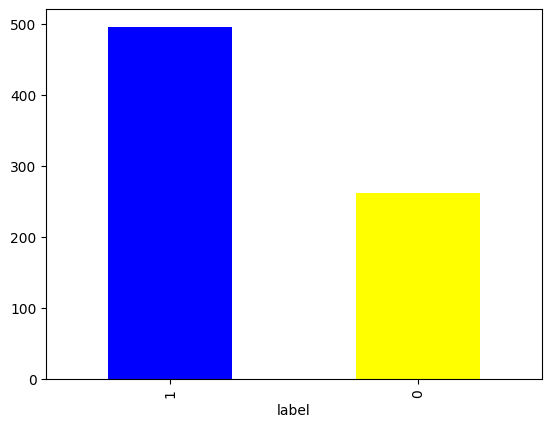

In [86]:
diabetes['label'].value_counts().plot(kind = 'bar', color = ['blue','yellow'])

This looks to be relatively balanced

Checking the correlation between features. Viewing wrt label

<Axes: >

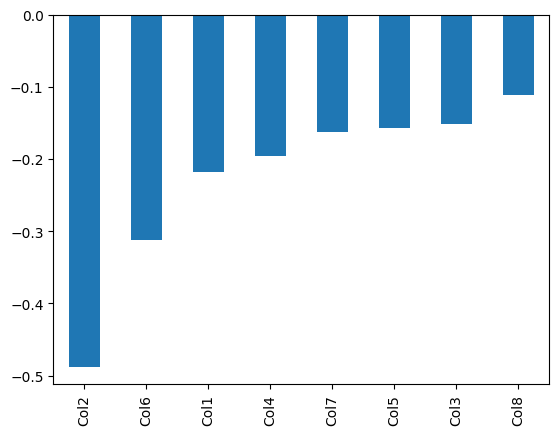

In [17]:
diabetes.corr()['label'][:-1].sort_values().plot(kind = 'bar')

<Axes: >

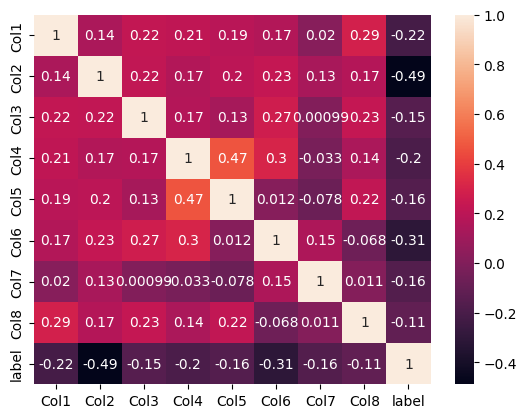

In [18]:
# correlation between actual variables themselves, we see that highest corelation is between col4 and col5
sns.heatmap(diabetes.corr(), annot= True)

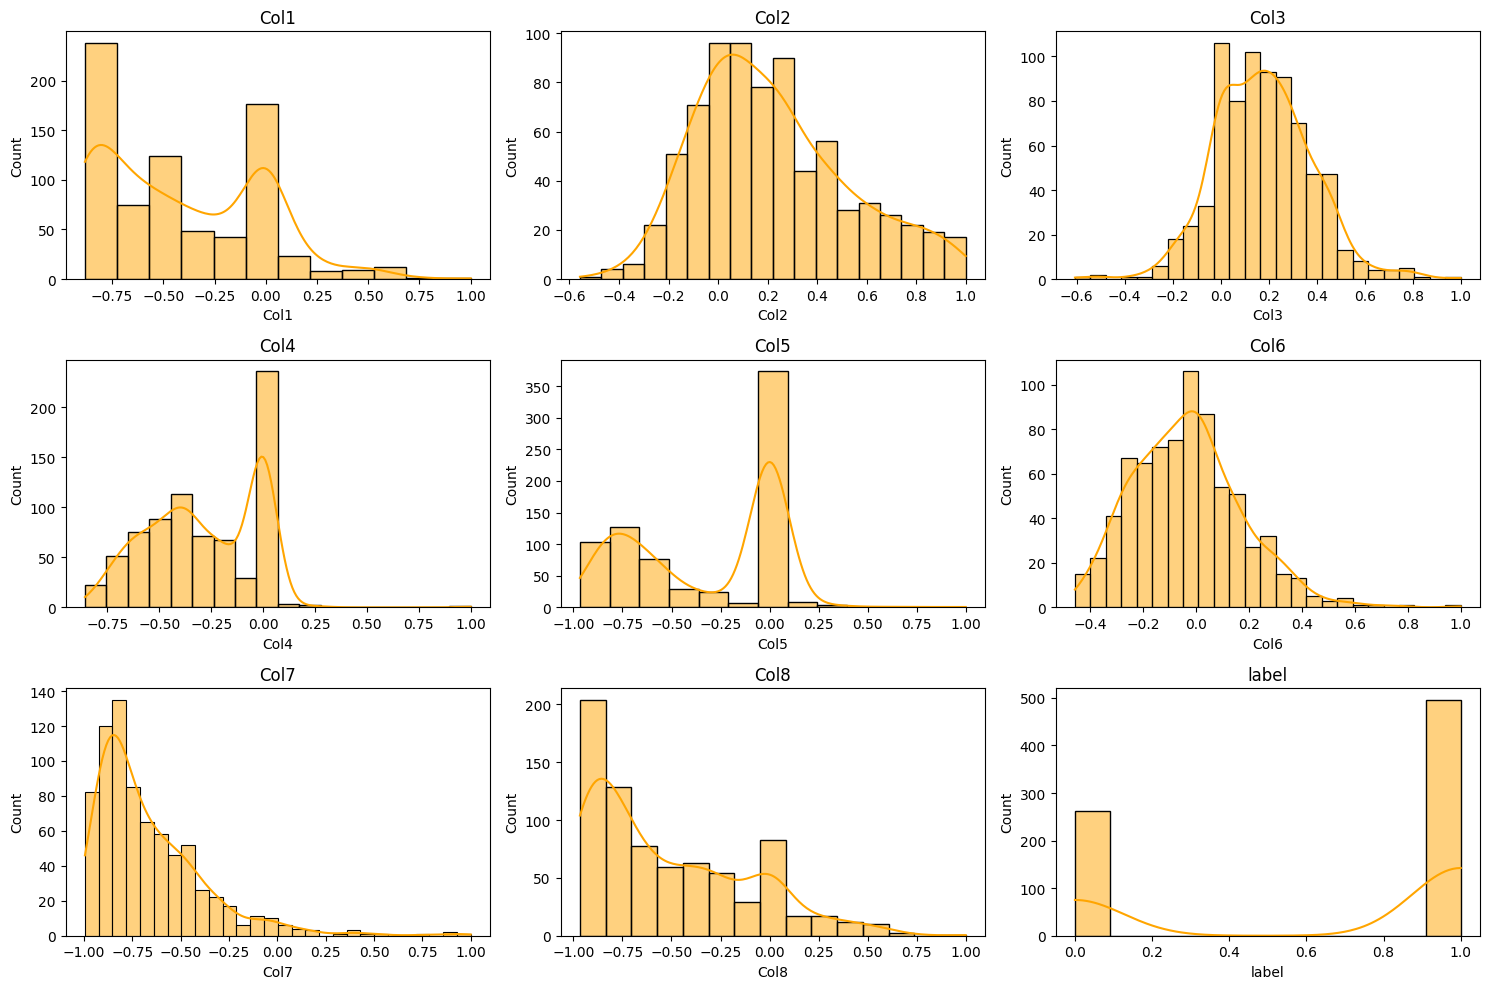

In [20]:
# distribution plot for all attributes to see features if they are normally distributed

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(diabetes.columns):
    row = i // 3
    col = i % 3
    sns.histplot(diabetes[column], ax=axes[row, col], kde=True, color = 'orange')
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

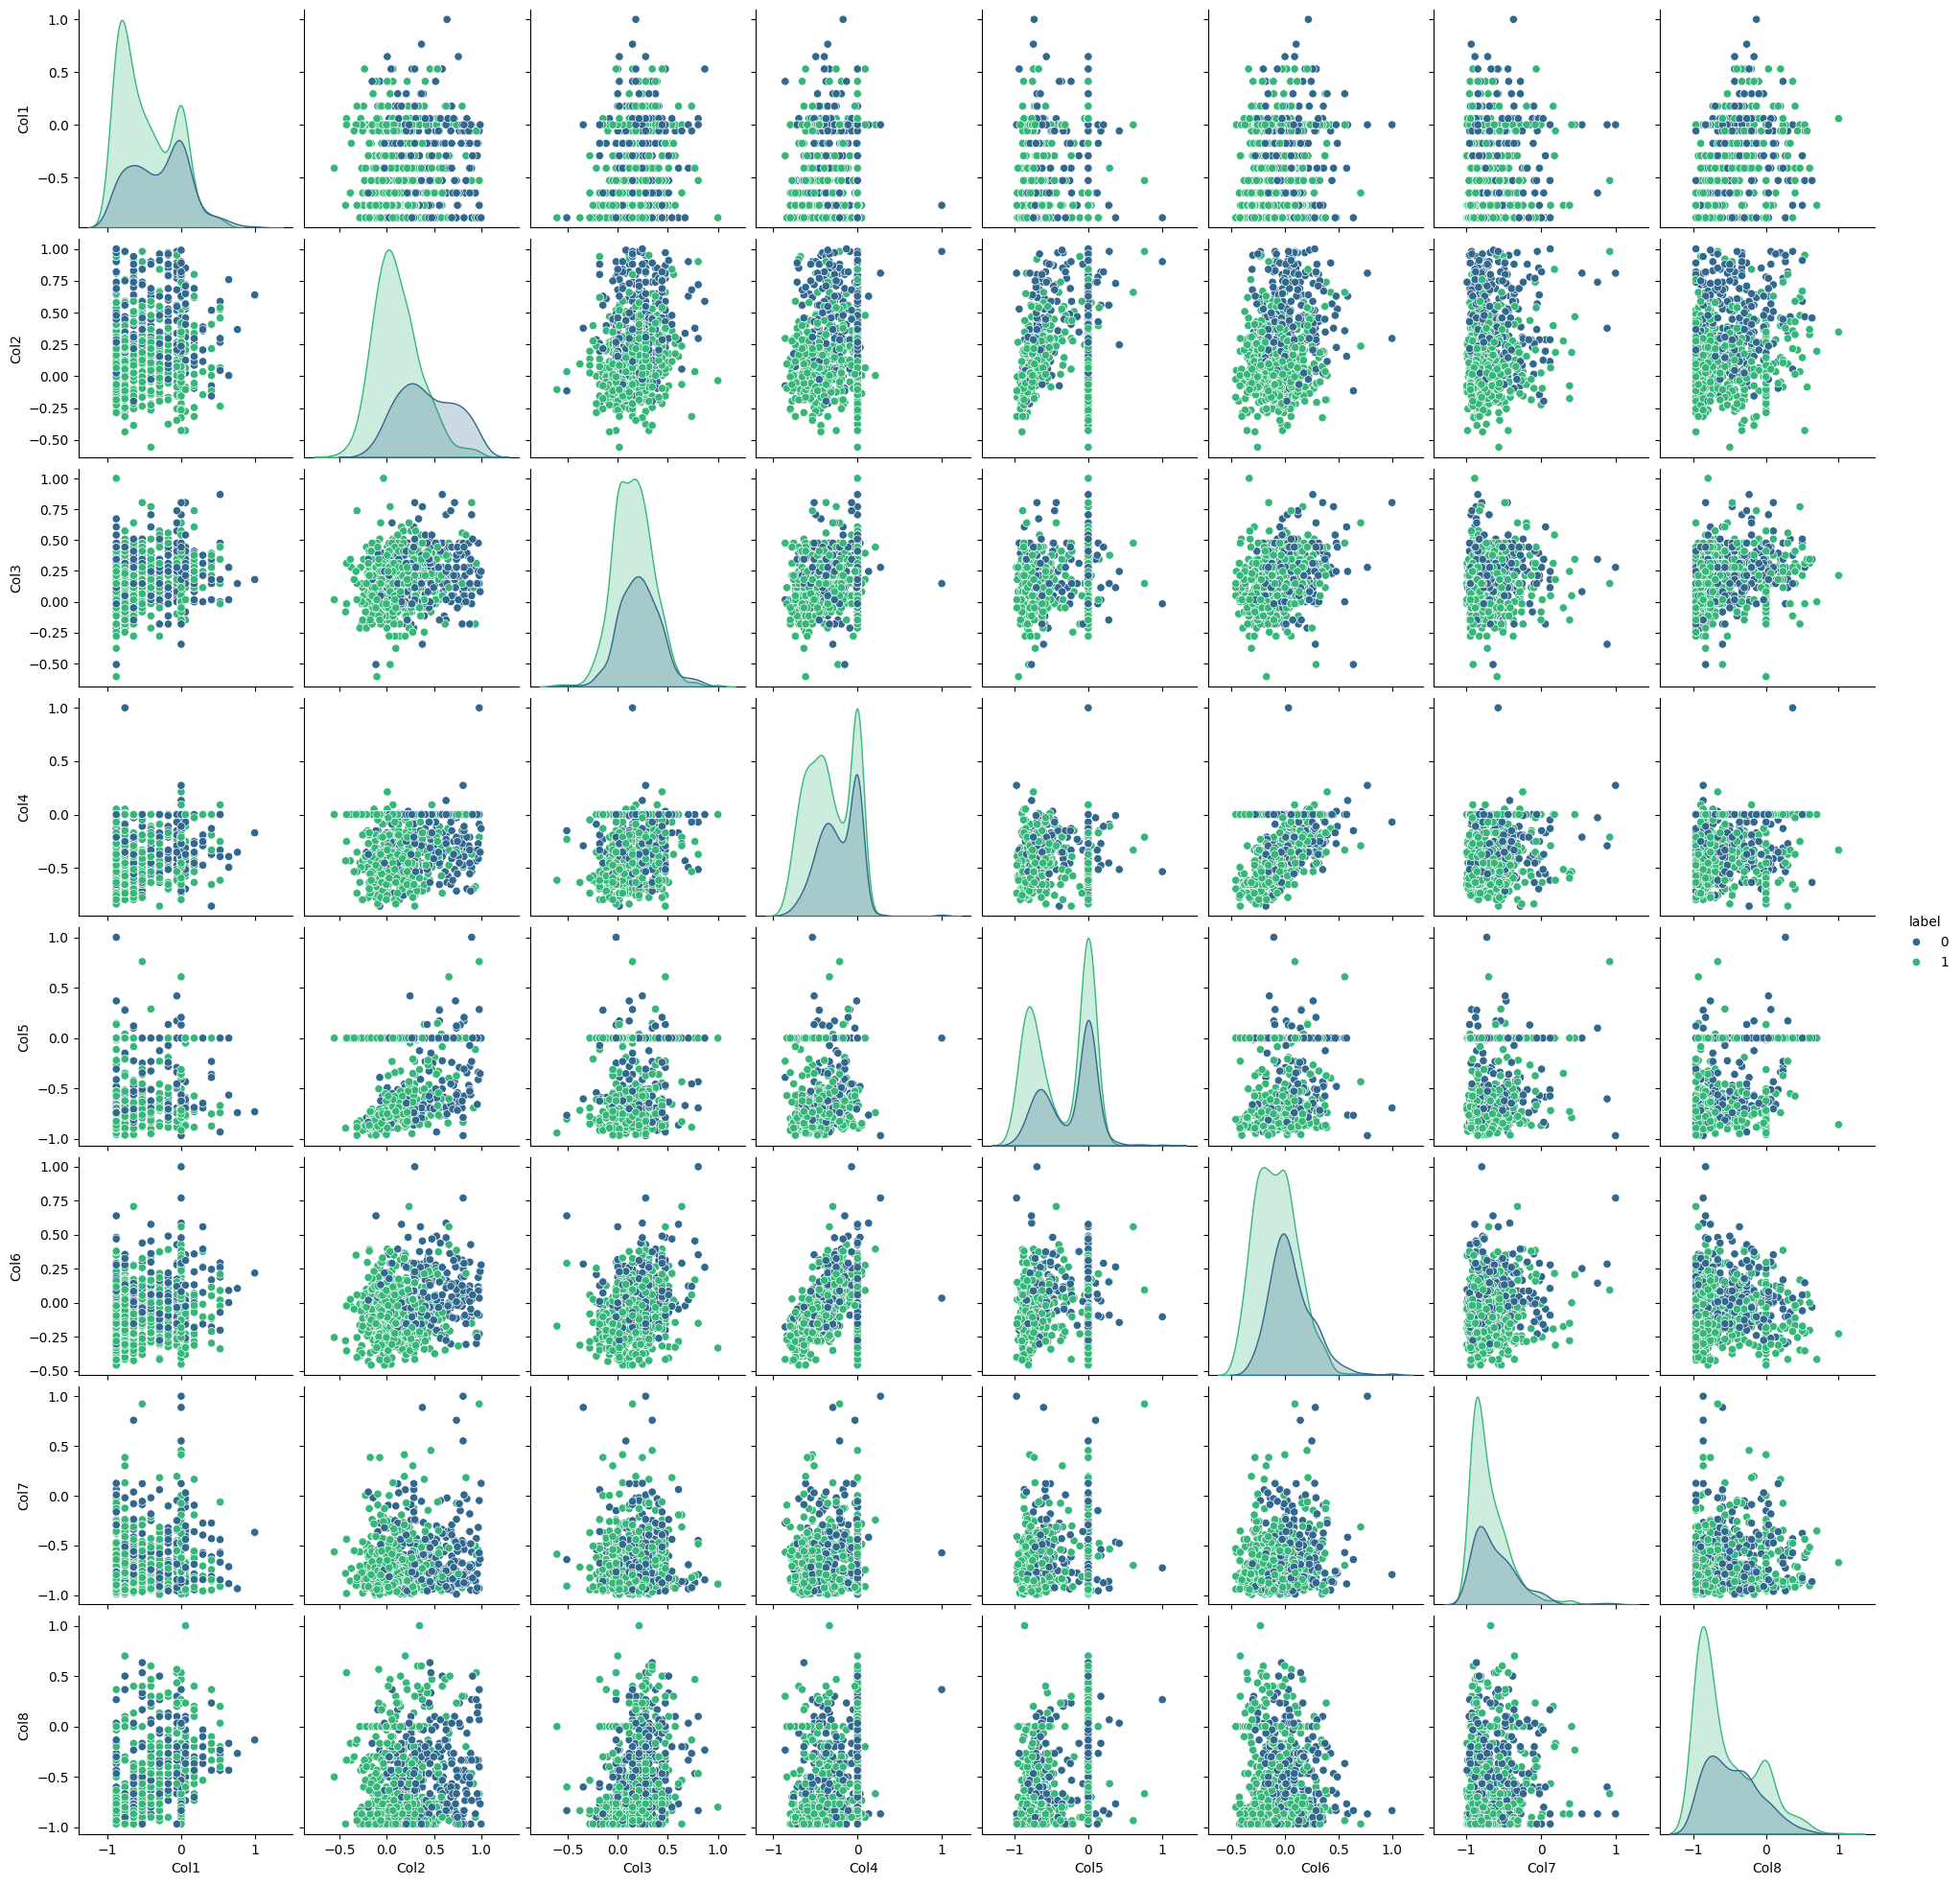

In [21]:
# visualising the relationship between features and to see the outliers in broader view
sns.pairplot(diabetes, hue = 'label', palette = 'viridis')

#### Step 3. Split into 70% train 30% test

In [22]:
#convert the diabestes into numpy array

diabetes_n = np.array(diabetes, dtype = np.float32)

X_diabetes = diabetes_n[:,:-1]
y_diabetes = diabetes_n[:,[-1]]

print("X_diabetes Shape:", X_diabetes.shape)
print("y_diabetes Shape:", y_diabetes.shape)

X_diabetes Shape: (758, 8)
y_diabetes Shape: (758, 1)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,y_diabetes, test_size=0.3,random_state=101)

As we have already mentioned above, data is already scaled in the range (could be [-1,1]), no need to perform scaling step. Scaling is important as we are working with weights and biases in neural network, if we have large values in the features then that could cause errors in the weights. So to avoid any issues its better to scale the data. 

#### Step 4. Modify the model shown in the demo to take the new data

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
X_train.shape

(530, 8)

In [26]:
# Create the Model
model = Sequential()

model.add(Dense(16,input_shape = (8,),activation ='relu'))
model.add(Dense(8,activation = 'relu'))

# Binary Classification
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam')
          

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Step 5. Train the model on the data

In [27]:
# Train the Model
model.fit(x = X_train, y = y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7177 - val_loss: 0.7064
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.6922 - val_loss: 0.6704
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.6569 - val_loss: 0.6428
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.6383 - val_loss: 0.6208
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.6257 - val_loss: 0.6046
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.6123 - val_loss: 0.5921
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.5830 - val_loss: 0.5818
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.6067 - val_loss: 0.5734
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.5909 - val_loss: 0.5639
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.5480 - val_loss: 0.5535


We see the training loss and validation loss separately, and if the training loss becomes substantially lower than the validation loss, that signifies that we are overfitting. Here we see the validation loss is little lower than the training loss with 10 epochs, which we will see in the chart below too, can tell about little underfitting.

In [28]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

None


#### Evaluating Model Performance

In [29]:
losses = pd.DataFrame(model.history.history)

<Axes: >

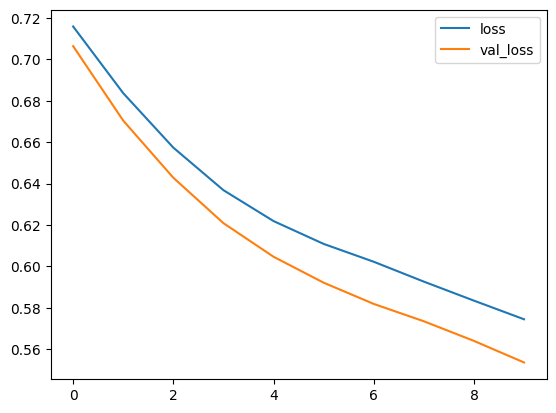

In [30]:
losses.plot()

#### Step 6. Make predictions on the test data and compare them to the test labels

In [31]:
predictions = model.predict(X_test)
predictions = (predictions >=0.5).astype(int)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [32]:
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print('\n Train: {}, Test: {}'.format(train_loss, test_loss))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.5634
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.5596

 Train: 0.5650955438613892, Test: 0.5425173044204712


#### Step 7. Calculate the accuracy of your results

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
accuracy = accuracy_score(y_test , predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7105263157894737


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.12      0.21        74
         1.0       0.70      0.99      0.82       154

    accuracy                           0.71       228
   macro avg       0.80      0.56      0.52       228
weighted avg       0.77      0.71      0.63       228



In [36]:
confusion_matrix(y_test,predictions)

array([[  9,  65],
       [  1, 153]])

Model loss is high and accuracy is also low. Let's experiment how we can improve on both

#### Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

In the above model, we saw that when the epochs were 10, it didnt perform that well. May be we will try to increase the epochs and we will try to make use of high level keras API, we can swap the less informative metrics s.a loss with highly interpretable metrics s.a accuracy to get the better understanding of model behavior. Let's try that with same epochs = 10

In [37]:
model_2 = Sequential()

model_2.add(Dense(16,input_shape = (8,),activation ='relu'))
model_2.add(Dense(8,activation = 'relu'))

# Binary Classification
model_2.add(Dense(1,activation = 'sigmoid'))
model_2.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model_2.fit(x = X_train, y = y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 0.6732 - val_accuracy: 0.6887 - val_loss: 0.6459
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.6327 - loss: 0.6607 - val_accuracy: 0.6887 - val_loss: 0.6340
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.6538 - loss: 0.6481 - val_accuracy: 0.6792 - val_loss: 0.6222
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.6667 - loss: 0.6283 - val_accuracy: 0.6792 - val_loss: 0.6116
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.6225 - loss: 0.6365 - val_accuracy: 0.6792 - val_loss: 0.6030
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.5888 - loss: 0.6464 - val_accuracy: 0.6792 - val_loss: 0.5949
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.6208 - loss: 0.6220 - val_accuracy: 0.6792 - val_loss: 0.5842
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.6557 - loss: 0.5933 - val_accuracy: 0.68

Here we see that model, didnt perform any significantly well. On training accuracy dropped from 66% to 64% whereas validation accuracy slightly increased at the last epoch. It is a sign that we are overfitting.

#### We can further try to increase the nodes and increase the number of epochs initially

In [39]:
model_3 = Sequential()

model_3.add(Dense(20,input_shape = (8,),activation ='relu'))

model_3.add(Dense(10,activation = 'relu'))

# Binary Classification
model_3.add(Dense(1,activation = 'sigmoid'))
model_3.compile(loss = 'binary_crossentropy', optimizer= 'adam')

In [40]:
# Train the Model
model_3.fit(x = X_train, y = y_train, epochs = 300, validation_split = 0.2)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6845 - val_loss: 0.6530
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.6563 - val_loss: 0.6321
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.6407 - val_loss: 0.6160
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.6315 - val_loss: 0.6010
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.6134 - val_loss: 0.5856
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.5927 - val_loss: 0.5728
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.5839 - val_loss: 0.5614
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.5668 - val_loss: 0.5537
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 0.5595 - val_loss: 0.5432
Epoch 10/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.5732 - val_loss: 0.5315
Epoch 11/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.5424 - val_loss: 0.5242
Epoch 12/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [43]:
losses = pd.DataFrame(model_3.history.history)

<Axes: >

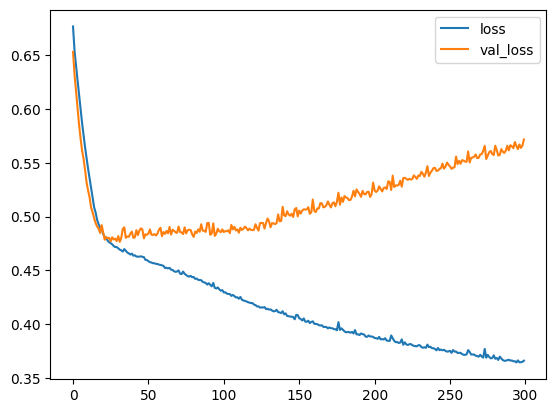

In [44]:
losses.plot()

In [45]:
print(model_3.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,205 (4.71 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 804 (3.14 KB)

None


##### This is an example of overfitting. Initially during the first couple of epochs, both validation and training loss were decreasing, which is good. However at a certain point of time, we see that training loss is still decreasing but validation loss started increasing. This tells us that we are overfitting to our training dataset. We are training here for too many loss.

We will use the early stopping criteria - to stop the training based on the validation loss before it starts to overfit as shown

In [75]:
model_4 = Sequential()

model_4.add(Dense(20,input_shape = (8,),activation ='relu'))

model_4.add(Dense(10,activation = 'relu'))

# Binary Classification
model_4.add(Dense(1,activation = 'sigmoid'))
model_4.compile(loss = 'binary_crossentropy', optimizer= 'adam')

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
#help(EarlyStopping)

In [78]:
early_stop = EarlyStopping(monitor = 'val_loss',mode = 'min', verbose = 1, patience = 20)

In [79]:
# Train the Model
model_4.fit(x = X_train, y = y_train, epochs = 300, validation_split = 0.2, callbacks = [early_stop])

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6921 - val_loss: 0.6758
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.6685 - val_loss: 0.6563
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.6513 - val_loss: 0.6409
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.6397 - val_loss: 0.6285
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.6390 - val_loss: 0.6191
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.6172 - val_loss: 0.6063
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.6077 - val_loss: 0.5951
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.6056 - val_loss: 0.5815
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.5946 - val_loss: 0.5727
Epoch 10/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.5604 - val_loss: 0.5602
Epoch 11/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.5660 - val_loss: 0.5472
Epoch 12/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 

It stopped at 61st epoch - early stopped was triggered

In [80]:
print(model_4.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,205 (4.71 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 804 (3.14 KB)

None


<Axes: >

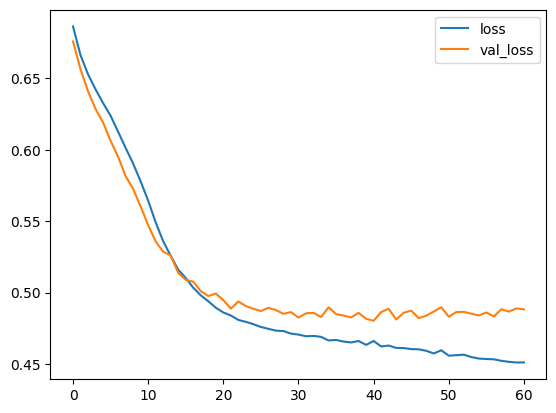

In [81]:
model_loss = pd.DataFrame(model_4.history.history)
model_loss.plot()

In [84]:
# making predictions on the test data
prediction_2 = model_4.predict(X_test)
predictions_2 = (prediction_2 >=0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [85]:
accuracy = accuracy_score(y_test , predictions_2)
print("Accuracy:", accuracy)

Accuracy: 0.7631578947368421


In [86]:
train_loss = model_4.evaluate(X_train, y_train)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.4373


In [87]:
test_loss = model_4.evaluate(X_test, y_test)
print('\n Train: {}, Test: {}'.format(train_loss, test_loss))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.4573

 Train: 0.4568583369255066, Test: 0.4440933167934418


In [88]:
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

         0.0       0.66      0.57      0.61        74
         1.0       0.80      0.86      0.83       154

    accuracy                           0.76       228
   macro avg       0.73      0.71      0.72       228
weighted avg       0.76      0.76      0.76       228



In [89]:
confusion_matrix(y_test,predictions_2)

array([[ 42,  32],
       [ 22, 132]])

The performance was improved by finding the model which has right balance. It was not overfitting and underfitting and it performed relatively well on the unseen test data.

In [90]:
from tensorflow.keras.layers import Dropout

Another way to find the best model which is not overfitting is by adding in DropOut Layer. Dropout Layer will turn off the percentage of neuron randomly. Also, we are adding in another hidden layer, increased the number of neurons and metrics accuracy in compile.

In [91]:
model_5 = Sequential()

model_5.add(Dense(35,input_shape = (8,),activation ='relu'))
model_5.add(Dropout(0.2))

model_5.add(Dense(20,activation = 'relu'))
model_5.add(Dropout(0.2))

model_5.add(Dense(10,activation = 'relu'))
model_5.add(Dropout(0.2))

# Binary Classification
model_5.add(Dense(1,activation = 'sigmoid'))
model_5.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
early_stop_2 = EarlyStopping(monitor = 'val_loss',mode = 'min', verbose = 1, patience = 20)

In [93]:
# Train the Model
model_5.fit(x = X_train, y = y_train, epochs = 300, validation_split = 0.2, callbacks = [early_stop_2])

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4257 - loss: 0.6988 - val_accuracy: 0.6981 - val_loss: 0.6781
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.5822 - loss: 0.6805 - val_accuracy: 0.6981 - val_loss: 0.6489
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6163 - loss: 0.6615 - val_accuracy: 0.6887 - val_loss: 0.6241
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6291 - loss: 0.6463 - val_accuracy: 0.6887 - val_loss: 0.6056
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.6688 - loss: 0.6186 - val_accuracy: 0.6981 - val_loss: 0.5918
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.6043 - loss: 0.6373 - val_accuracy: 0.7358 - val_loss: 0.5798
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.6540 - loss: 0.5960 - val_accuracy: 0.7453 - val_loss: 0.5613
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.6710 - loss: 0.5816 - val_accuracy: 

<Axes: >

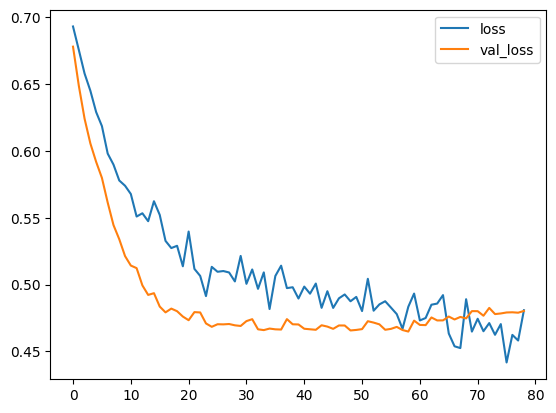

In [95]:
model_5_loss = pd.DataFrame(model_5.history.history)
model_5_loss[['loss','val_loss']].plot()

Notice here that the training and validation loss are quickly going down and they are flattening out at the same rate. Good Behavior

In [101]:
print(model_5.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 35)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 20)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,770 (14.73 KB)

 Trainable params: 1,256 (4.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,514 (9.82 KB)

None


In [97]:
# making predictions on the test data
prediction_4 = model_5.predict(X_test)
predictions_4 = (prediction_4 >=0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


In [98]:
accuracy_4 = accuracy_score(y_test , predictions_4)
print("Accuracy:", accuracy_4)

Accuracy: 0.7719298245614035


In [99]:
# Evaluating the Model
train_loss_4, train_accuracy_4 = model_5.evaluate(X_train, y_train)
test_loss_4,  test_accuracy_4 = model_5.evaluate(X_test, y_test)
print('\n Train: {}, Test: {}'.format(train_loss_4, test_loss_4))
print('\n Train_accuracy: {}, Test_accuracy: {}'.format(train_accuracy_4, test_accuracy_4))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.7941 - loss: 0.4110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.7781 - loss: 0.4430

 Train: 0.43623626232147217, Test: 0.44134390354156494

 Train_accuracy: 0.7849056720733643, Test_accuracy: 0.7719298005104065


In [225]:
print(classification_report(y_test,predictions_4))

              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64        74
         1.0       0.82      0.86      0.84       154

    accuracy                           0.78       228
   macro avg       0.75      0.73      0.74       228
weighted avg       0.77      0.78      0.77       228



In [100]:
confusion_matrix(y_test,predictions_4)

array([[ 50,  24],
       [ 28, 126]])

- We trained the initial NN that showed the training loss above 55% and low accuracy.
- By modify the NN with increasing epochs, applying the early stopping criteria, we found the improved best fitted model which was preventing overfitting and performing relatively well.
- Later, we also added the drop out layer method and increased the neurons and increased the layers, also we added the easily interpretible metric like accuracy in compile. This gave us even more improved model, where it was not overfitting at all, and performing well on unseen data i.e test data.
- when you increase the layers/or neurons, the complexity of model gets high and it tends to learn more patterns in the datset. Simutaneously while doing this we need to take care of the overfitting issue and vanshing Gradient descent issue.

Contd..PyTorch in another NB

Thank You ! 